In [45]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [110]:
data=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_liverpool.csv")
data=data.dropna()
data=data.sort_values(by="Tritium")
print(data.shape)
data['symbol']=[x.split('(')[1].replace(')','') for x in data.AA_name]
data.head(20)

(20, 8)


,AA_name,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,symbol
18,Tryptophan (W),0.08,0.190913,0.193915,0.213677,0.208677,0.153386,0.343924,W
16,Threonine (T),0.20,0.228619,0.262922,0.217052,0.092273,0.067590,0.146409,T
4,Phenylalanine (F),0.32,0.516061,0.322133,0.351724,0.104132,0.076863,0.179874,F
19,Tyrosine (Y),0.42,0.812569,0.703994,0.856050,0.127747,0.092779,0.226699,Y
9,Leucine (L),0.54,0.872634,0.772678,0.837387,0.072573,0.051517,0.123785,L
17,Valine (V),0.56,0.749149,0.627241,0.697898,0.081165,0.057159,0.131372,V
8,lysine (K),0.60,0.321348,0.218634,0.128205,0.195829,0.137179,0.370234,K
7,Isoleucine (I),1.00,0.880578,0.828866,0.777496,0.090576,0.065202,0.160899,I
10,Methionine (M),1.12,1.169987,0.924257,0.519452,0.183090,0.135334,0.324111,M
1,Cysteine (C),1.62,1.767490,1.999636,2.298462,0.230166,0.179135,0.396897,C


In [105]:
data.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.927928,0.961534,0.944033,-0.046891,-0.091387,-0.086330
Asym_NEH,0.927928,1.000000,0.989498,0.982192,-0.172773,-0.205254,-0.206099
APE,0.961534,0.989498,1.000000,0.994909,-0.134986,-0.166513,-0.174853
MPE,0.944033,0.982192,0.994909,1.000000,-0.136094,-0.164247,-0.178448
Asym_NEH_ci,-0.046891,-0.172773,-0.134986,-0.136094,1.000000,0.994302,0.989828
APE_ci,-0.091387,-0.205254,-0.166513,-0.164247,0.994302,1.000000,0.986367
MPE_ci,-0.086330,-0.206099,-0.174853,-0.178448,0.989828,0.986367,1.000000


In [121]:
Asym_NEH=abs(data.Tritium - data.Asym_NEH)/data.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data.Tritium - data.APE)/data.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data.Tritium - data.MPE)/data.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.3123419686185616 0.3293255106304882
APE 0.18816937451530852 0.316889409113261
MPE 0.22806661394917727 0.3957226056959602


In [47]:
data2=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_utmb.csv")
data2=data2.dropna()
data2=data2.sort_values(by="Tritium")
print(data2.shape)
data2['symbol']=[x.split('(')[1].replace(')','') for x in data2.AA_name]
# data2.head(20)

(20, 8)


In [107]:
data2.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci
Tritium,1.000000,0.960243,0.977495,0.973000,-0.036546,-0.134728,-0.110489
Asym_NEH,0.960243,1.000000,0.988110,0.982794,0.009151,-0.057926,-0.029892
APE,0.977495,0.988110,1.000000,0.997902,-0.079337,-0.148829,-0.125647
MPE,0.973000,0.982794,0.997902,1.000000,-0.107479,-0.170329,-0.149236
Asym_NEH_ci,-0.036546,0.009151,-0.079337,-0.107479,1.000000,0.966259,0.968312
APE_ci,-0.134728,-0.057926,-0.148829,-0.170329,0.966259,1.000000,0.996420
MPE_ci,-0.110489,-0.029892,-0.125647,-0.149236,0.968312,0.996420,1.000000


In [122]:
Asym_NEH=abs(data2.Tritium - data2.Asym_NEH)/data2.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data2.Tritium - data2.APE)/data2.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data2.Tritium - data2.MPE)/data2.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.2538145036582212 0.4537068861890837
APE 0.15132494639906272 0.21464931517495656
MPE 0.1397974221908759 0.22521664071084097


In [102]:
def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,7)) 
    plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        if i ==0: k=-1
        else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,40,2)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
    plt.xticks(range(0,40,2),input_data.AA_name,rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


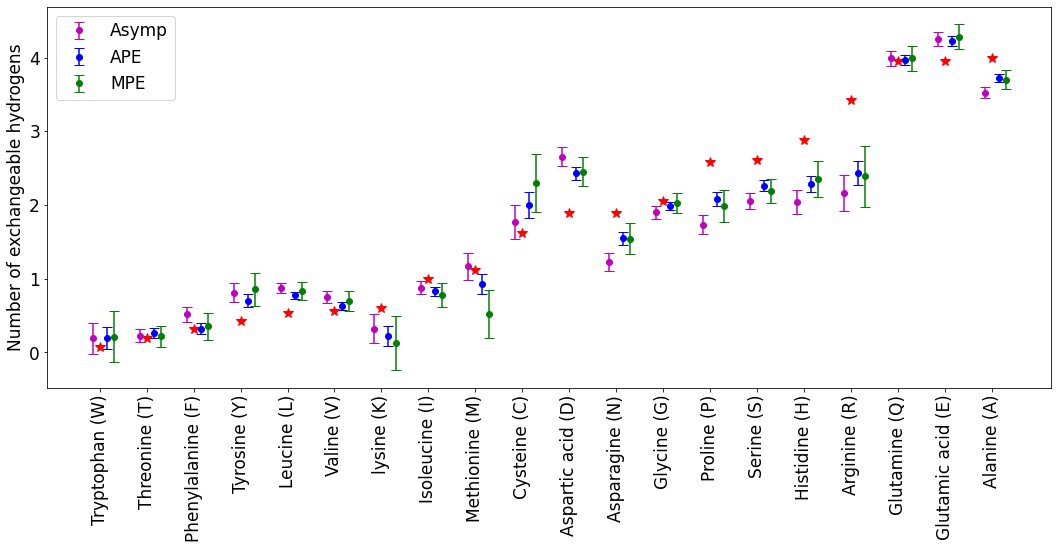

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


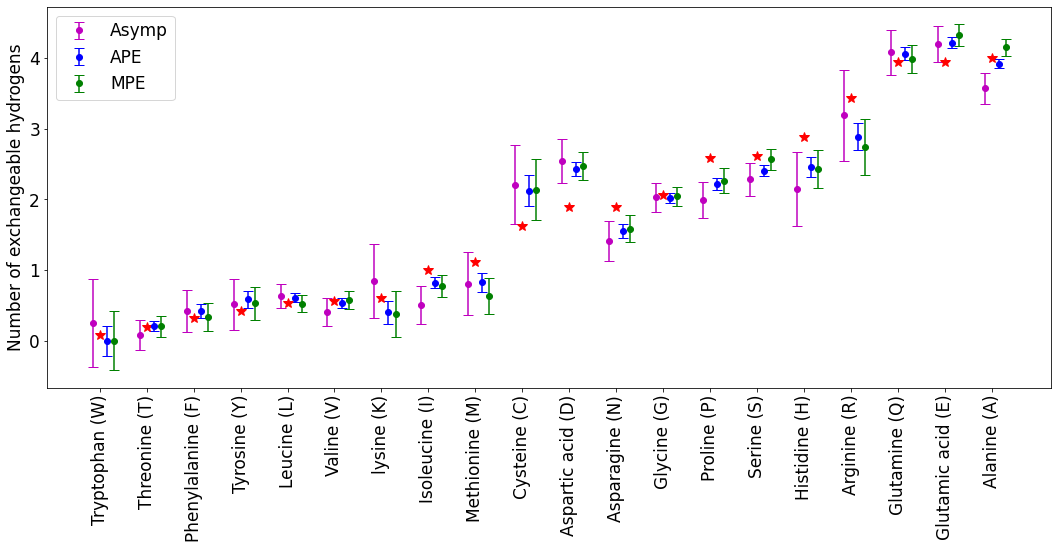

In [103]:
plot_neh_aa(data,'data1')
plot_neh_aa(data2,'data2')

In [59]:
# def plot_neh_aa(input_data):
#     plt.rc('font', size=17)
#     plt.rc('figure', figsize=(14,14)) 
#     cols=['Asym_NEH', 'APE', 'MPE']
#     col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
#     plt.errorbar( input_data['Tritium'],range(0,40,2), [0]*20,fmt ='o',mfc='r',color="r",ms=6)
#     plt.yticks(range(0,40,2),input_data.AA_name)
#     cs=['m','b','g']

#     for i in range(3):
#         col=cols[i]
#         col_ci=col_cis[i] 
#         print("============> ",col,"\t")
#         plt.errorbar( x=input_data[col],y=[x+0.5*i for x in range(0,40,2)], xerr=input_data[col_ci],fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=cols[i])
        
#         plt.xlabel("NEH")    
#         plt.savefig(col+"_CI.jpeg",dpi=900,bbox_inches='tight')
#     plt.legend()
#     plt.show()
# plot_neh_aa(data2)

In [3]:
# # plt.scatter(data.Tritium,data.Tritium)
# plt.scatter(data.Tritium,data.APE)
# plt.scatter(data.Tritium,data.MPE)

In [4]:
# cols=['Asym_NEH', 'APE', 'MPE']
# col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']

# for i in range(3):
#     col=cols[i]
#     col_ci=col_cis[i] 
#     print("============> ",col,"\t")
#     plt.rc('font', size=17) 
#     plt.rc('figure', figsize=(12,7)) 
#     plt.errorbar(range(20), data[col], data[col_ci],fmt ='o',mfc='r',color="r",ms=6)
#     plt.errorbar(range(20), data['Tritium'], [0]*20,fmt ='o',mfc='m',color="m",ms=6)
# #     plt.xticks(range(20),[x.upper() for x in ['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p','q', 'r', 's', 't', 'v', 'w', 'y']])
#     plt.xticks(range(20),data.symbol)
#     plt.ylabel("NEH")    
#     plt.savefig(col+"_CI.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()

In [16]:
# cols=['Asym_NEH', 'APE', 'MPE']
# col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
# plt.errorbar(range(0,40,2), data['Tritium'], [0]*20,fmt ='o',mfc='r',color="r",ms=6)
# cs=['m','b','g']

# for i in range(3):
#     col=cols[i]
#     col_ci=col_cis[i] 
#     print("============> ",col,"\t")
#     plt.rc('font', size=17) 
#     plt.rc('figure', figsize=(18,7)) 
#     plt.errorbar([x+0.3*i for x in range(0,40,2)], data[col], data[col_ci],fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=cols[i])
#     plt.xticks(range(0,40,2),data.symbol)
#     plt.ylabel("NEH")    
#     plt.savefig(col+"_CI.jpeg",dpi=900,bbox_inches='tight')
# plt.legend()

(20, 8)


In [14]:
def plot_neh_aa(data):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.errorbar(range(0,40,2), data2['Tritium'], [0]*20,fmt ='o',mfc='r',color="r",ms=6)
    cs=['m','b','g']

    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        print("============> ",col,"\t")
        plt.rc('font', size=17) 
        plt.rc('figure', figsize=(18,7)) 
        plt.errorbar([x+0.3*i for x in range(0,40,2)], data2[col], data2[col_ci],fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=cols[i])
        plt.xticks(range(0,40,2),data2.symbol)
        plt.ylabel("NEH")    
        plt.savefig(col+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.legend()
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


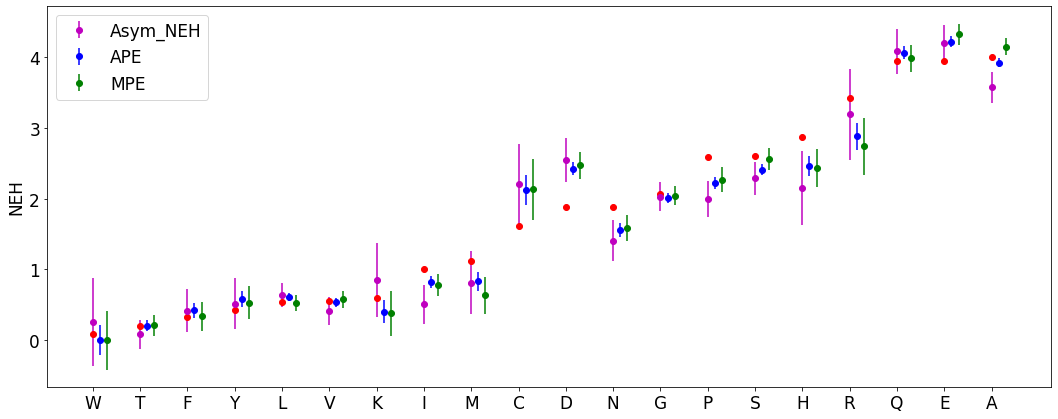

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


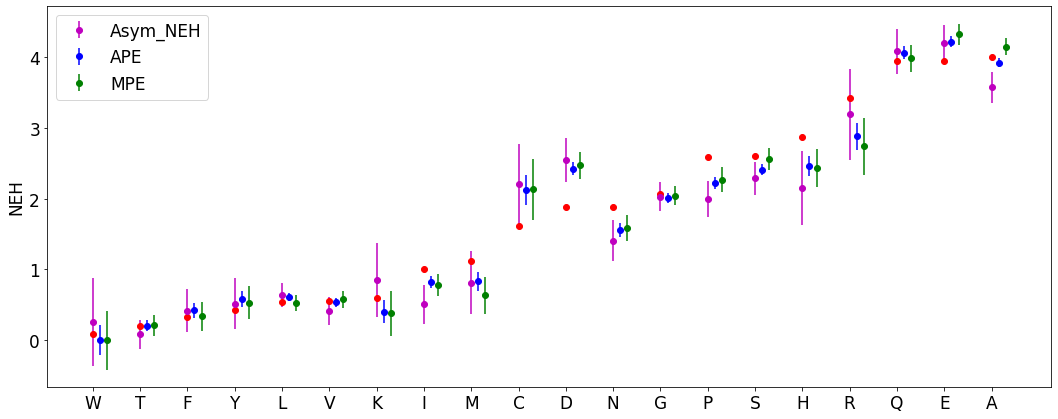

In [15]:
plot_neh_aa(data)
plot_neh_aa(data2)

In [8]:
# plt.rc('font', size=17) 
# plt.rc('figure', figsize=(9,9)) 
# plt.scatter(data.Asym_NEH,data2.Asym_NEH)
# # plt.scatter(data.APE,data2.APE)
# # plt.scatter(data.MPE,data2.MPE)

In [9]:
(data[data.Asym_RMSE < 0.01].shape[0],
data[data.APE_RMSE < 0.01].shape[0],
data[data.MPE_RMSE < 0.01].shape[0])

AttributeError: 'DataFrame' object has no attribute 'Asym_RMSE'

In [ ]:
(100*data[data.Asym_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.APE_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.MPE_RMSE < 0.01].shape[0]/data.shape[0])

In [ ]:
import numpy as np
import seaborn as sns
plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
sns.kdeplot(data.MPE_RMSE, bw=0.3,label='MPE')
sns.kdeplot(data.Asym_RMSE, bw=0.25,label='Asymp')
sns.kdeplot(data.APE_RMSE, bw=0.55,label='APE')
sns.kdeplot(data.il_rmse, bw=0.3,label='Ilchenko et al.')
plt.xlabel('RMSE')
plt.legend()

plt.savefig("rmse_utmb.jpeg",dpi=900,bbox_inches='tight')

In [ ]:
plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.Asym_NEH,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.Asym_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("Estimation of NEH using the \nmonoisotopic RIA at the plateau of labeling")
plt.legend()
plt.savefig("asym_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.APE_NEH,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.APE_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("Estimation of NEH using  \nAtomic percent excess (APE) ")
plt.legend()
plt.savefig("ape_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.MPE_NEH,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.MPE_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("Estimation of NEH using \nMolecular percent enrichment (MPE)")
plt.legend()
plt.savefig("mpe_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

# plt.rc('font', size=15) 
# plt.figure(figsize=(8,8))
# plt.scatter(data.T_NEH,data.sd_neh,alpha=0.5,label='sd',c='k')
# plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
# plt.xlabel("NEH (Tritium)")
# plt.ylabel("Estimation of NEH using the \nmonoisotopic RIA at the plateau of labeling")
# plt.legend()
# plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.il_neh,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.il_neh)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("NEH (Ilchenko et al.)")
plt.legend()
plt.savefig("lich_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

In [ ]:
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\neh_from_formula_utmb.csv")
data.columns

In [ ]:
# plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,label='il_neh',c='k')
# plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
# plt.legend()
# plt.show()

In [ ]:
plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data['data.T_NEH'],data.neh)[0][1]),c='k')
plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("NEH (using the Simultaneous \nestimation of label enrichment and NEH method)")
plt.legend()
plt.savefig("simul_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()